In [3]:
from math import sin, cos, pi
import matplotlib.pyplot as plt
from random import random, gauss

Threads = []

NbrThreads = 8
NbrSegments = 6
L = 30
sigma = 0.3

for i in range(NbrThreads):
    if i % 2 == 1:
        # Start the row with a specific point for even rows
        start_point = [0, i *  L * sin(pi / 3)]
    else:
        # Start the row with a specific point for odd rows
        start_point = [0, (1+i) * L * sin(pi / 3)]

    # Initialize the new row with the starting point
    row = [start_point]
    
    for j in range(NbrSegments):
        if i % 2 != 1:
            # Append the next points in the row for even rows
            row.append([row[-1][0] + L, row[-1][1]])
            row.append([row[-1][0] + cos(pi/3) * L, row[-1][1] - sin(pi/3) * L])
            row.append([row[-1][0] + L, row[-1][1]])
            row.append([row[-1][0] + cos(pi/3) * L, row[-1][1] + sin(pi/3) * L])
        else:
            # Append the next points in the row for odd rows
            row.append([row[-1][0] + L, row[-1][1]])
            row.append([row[-1][0] + cos(pi/3) * L, row[-1][1] + sin(pi/3) * L])
            row.append([row[-1][0] + L, row[-1][1]])
            row.append([row[-1][0] + cos(pi/3) * L, row[-1][1] - sin(pi/3) * L])
    row.append([row[-1][0] + L, row[-1][1]])

    # elongated cells

    # for j in range(NbrSegments):
    #     if i % 2 != 1:
    #         # Append the next points in the row for even rows
    #         row.append([row[-1][0] + L, row[-1][1]])
    #         row.append([row[-1][0] + cos(pi/3) * L, row[-1][1] - sin(pi/3) *3* L])
    #         row.append([row[-1][0] + L, row[-1][1]])
    #         row.append([row[-1][0] + cos(pi/3) * L, row[-1][1] + sin(pi/3) *3* L])
    #     else:
    #         # Append the next points in the row for odd rows
    #         row.append([row[-1][0] + L, row[-1][1]])
    #         row.append([row[-1][0] + cos(pi/3) * L, row[-1][1] + sin(pi/3) *3* L])
    #         row.append([row[-1][0] + L, row[-1][1]])
    #         row.append([row[-1][0] + cos(pi/3) * L, row[-1][1] - sin(pi/3) *3* L])
    # row.append([row[-1][0] + L, row[-1][1]])

    # Append the row to the list
    Threads.append(row)

manipulated_points = []

def points_are_close(p1, p2, tol=1e-5):
    """Check if two points are close to each other within a specified tolerance."""
    return abs(p1[0] - p2[0]) < tol and abs(p1[1] - p2[1]) < tol

# Use in the loop
for thread in Threads:
    for point in thread:
        # Use points_are_close to compare points
        already_manipulated = any(points_are_close(point, manipulated_point) for manipulated_point in manipulated_points)
        if not already_manipulated:
            theta = random() * pi
            delta = gauss(0, L * sigma)

            # elongated Cells
            # theta = (random()/2+0.25) * pi
            # delta = gauss(0, 2 * L * sigma)

            # Nested loop to change all similar points simultaneously
            for nestedThread in Threads:
                for nestedPoint in nestedThread:
                    if nestedThread != thread:
                        if points_are_close(nestedPoint, point, tol=1e-5):
                            # Apply the manipulation
                            nestedPoint[0] += delta * cos(theta)
                            nestedPoint[1] += delta * sin(theta)

            # Change Actual Point
            point[0] += delta * cos(theta)
            point[1] += delta * sin(theta)

            # Add the point to the manipulated points list
            manipulated_points.append(point)

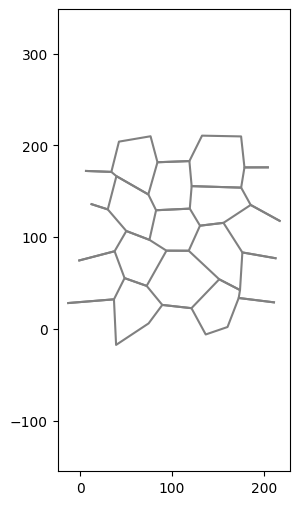

In [4]:
plt.figure(figsize=(3, 6))

for row in Threads:
    x, y = zip(*row)
    plt.plot(x, y, color='grey')

plt.axis('equal')
# plt.grid(True)
plt.show()

In [26]:
def write_threads_to_file(file_path, threads):
    """
    Writes the threads of points to a file in the specified format.

    Args:
        file_path (str): The path to the output file.
        threads (list of lists of lists): A list where each element is a thread, 
                                          and each thread is a list of points (x, y).
    """
    with open(file_path, 'w') as f:
        for thread_index, thread_points in enumerate(threads, start=1):
            # Write the thread header
            f.write(f"Thread {thread_index}:\n")
            
            # Write each point under the thread
            for point in thread_points:
                f.write(f"  {point[0]}, {point[1]}\n")
            
            f.write("\n")  # Add a newline for separation between threads

# Write the Threads data to the output file
output_file_path = 'outputfile.txt'
write_threads_to_file(output_file_path, Threads)